In [1]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
import ast

In [2]:
data = pd.read_csv('2012_2017_noun.csv', encoding='utf-8')

FileNotFoundError: [Errno 2] No such file or directory: '2012_2017_noun.csv'

In [4]:
sopmi = pd.read_csv("/content/drive/MyDrive/so_pmi.csv")

In [44]:
sopmi_dict = dict(sopmi.values.tolist())

In [49]:
data['noun'] = data['noun'].apply(lambda x: ast.literal_eval(x))

In [55]:
data.loc[0,'noun'][7]

'창사'

In [79]:
def scoring(sopmi_dict,string_value):
    score = 0
    length = len(string_value)
    for word in string_value:
      #print(word)
      try:
        sopmi_value = sopmi_dict[word]
        score += sopmi_value
      except: score +=0
      #print(score)
    return score, score/length

In [76]:
scoring(sopmi_dict, data.loc[0,'noun'])

(13410.100619000006, 25.302076639622655)

In [77]:
scoring(sopmi_dict, data.loc[1,'noun'])

(3506.7858750000005, 13.97125846613546)

In [80]:
# 너무 안돌아가서 tqdm 걸어둠
data['sopmi_score'] = 0
data['scaled_sopmi_score'] = 0
for i in tqdm(range(len(data))):
    string_value = data.loc[i,'noun']
    data.loc[i,'sopmi_score'], data.loc[i,'scaled_sopmi_score'] = scoring(sopmi_dict,string_value)

  0%|          | 0/76420 [00:00<?, ?it/s]

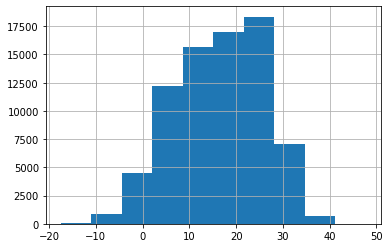

In [83]:
data['scaled_sopmi_score'].hist()

In [84]:
data.to_csv('sopmi_score_ver2.0.csv', encoding= 'utf-8-sig', index = False)